In [31]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# load the dataset
df= sns.load_dataset('tips')

In [33]:
# printing only top 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
# printing only bottom 5 rows
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [35]:
# brief information of the dateset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [36]:
# shape of data: number of rows and columns, number of rows=244 and number of columns=7
df.shape

(244, 7)

In [37]:
# Little stats on dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [38]:
# finding the number of missing values in every column
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [39]:
# finding the number of duplicate values
df.duplicated().sum()

1

In [40]:
# dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [41]:
# initally number of rows were 244, now 243
df.shape

(243, 7)

array([[<AxesSubplot: title={'center': 'total_bill'}>,
        <AxesSubplot: title={'center': 'tip'}>],
       [<AxesSubplot: title={'center': 'size'}>, <AxesSubplot: >]],
      dtype=object)

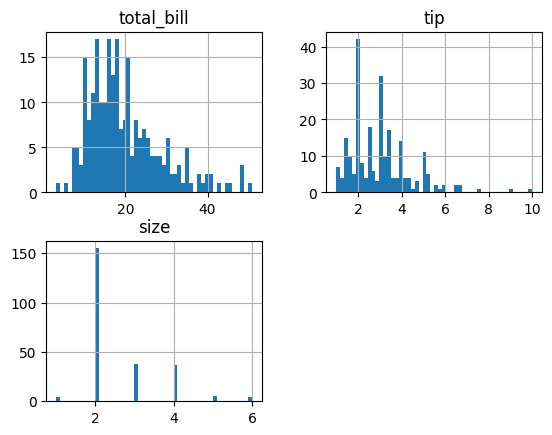

In [42]:
# make a histogram of only numerical variables (variables means column names)
df.hist(bins=50)

<AxesSubplot: xlabel='smoker', ylabel='tip'>

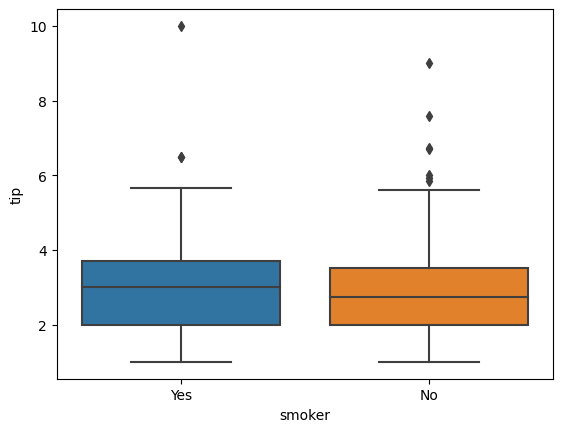

In [43]:
# make a boxplot
sns.boxplot(data=df, x='smoker', y='tip')

<AxesSubplot: xlabel='day', ylabel='tip'>

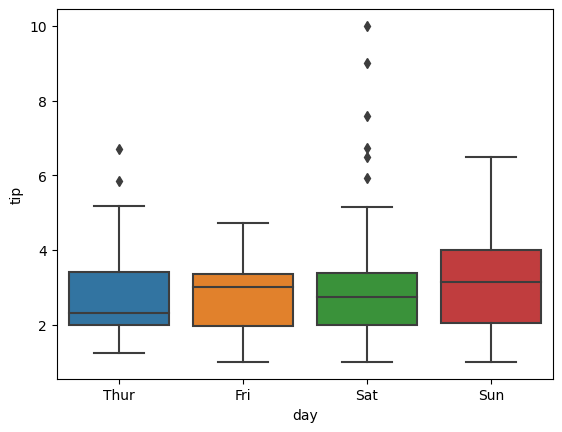

In [44]:
# another boxplot with different variables: note :: rectangular shaped points are outliers which affects the prediction 
sns.boxplot(data=df, y='tip', x='day')

In [45]:
# make correlation matrix, it shows the relationship between different variables (columns)
df_corr= df.corr()
df_corr

C:\Users\HP\AppData\Local\Temp\ipykernel_16180\2257258093.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= df.corr()


,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


### Correlation matrix is useful to find the relationship between different variables. Here we can see total_bill and tip correlation factor is 0.67 (>0.5), Which means they are correlated to each others.

<AxesSubplot: >

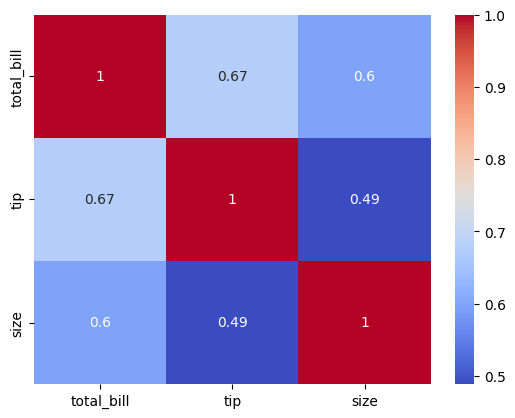

In [46]:
# showing correlation matrix using the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

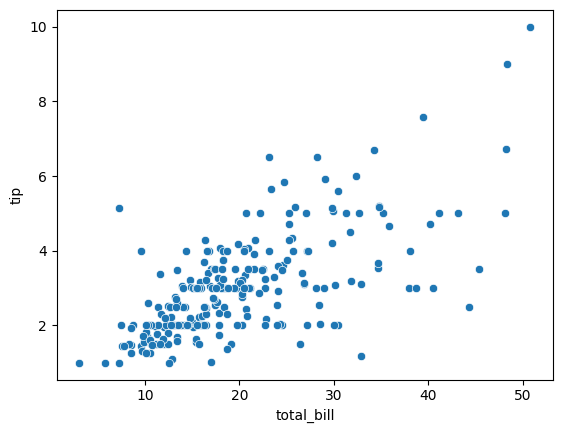

In [47]:
# making the scatterplot of tip and total bill
sns.scatterplot(data= df, x='total_bill', y='tip')

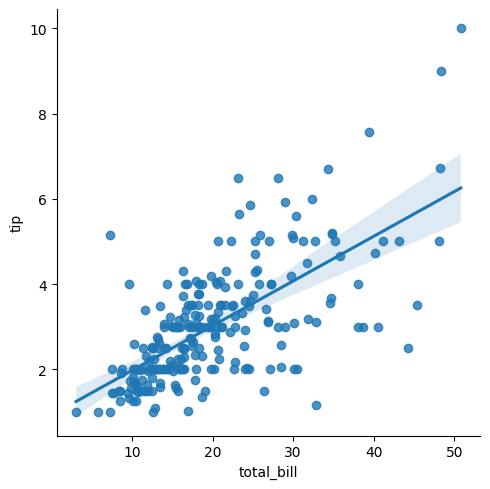

In [48]:
# finding the best fit line to do linear regression for prediction
sns.lmplot(data= df, x='total_bill', y='tip')

# Simple Linear Regression

### Simple linear regression is done when we have only one independent variable(input) and only one dependent variable(output).

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
# Step 1: Load the dataset
df = sns.load_dataset('tips')
X= df[['total_bill']]
y= df['tip']

In [51]:
# Step 2: Create the model
model= LinearRegression()

In [52]:
# Step 3: Fit the model (Train the model)
model.fit(X,y)

LinearRegression()

In [53]:
# Step 4: Predict from model
model.predict([[112]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.68301556])

Here you can see, when bill is 112 dollars, the customer tips was 12.68.

# Mulilinear Regression

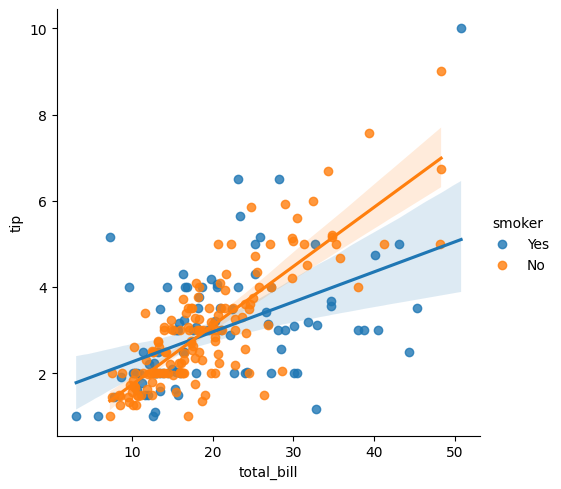

In [54]:
sns.lmplot(data= df, x='total_bill', y='tip', hue='smoker')

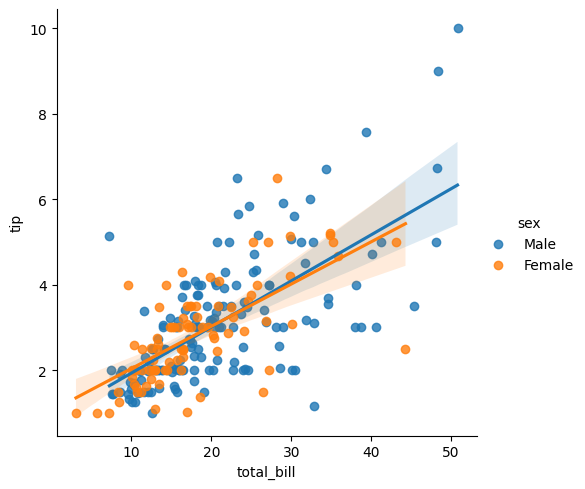

In [55]:
sns.lmplot(data= df, x='total_bill', y='tip', hue='sex')